# FIT 1043 Introduction to Data Science
## Assignment 2
#### Name: Chai Ke Rou
#### Student ID: 33363056

### 1 - Introduction

The aim of this report is to investigate, visualise data and build machine learning models for the data that has been collected by a global finance company over the years. The datasets comprise basic bank details and a lot of credit-related information. In order to build an intelligent system to segregate the people into credit score brackets, exploratory analysis was performed to make predictions about the credit score based on the collected informations to minimize the manual efforts.

The report's rough outline is shown as follows:
1. Introduction
2. Data Auditing
3. Data Description
4. Descriptive Statistics
5. Supervised Learning
6. Classification
7. Kaggle Submission
8. Conclusion
9. References

### 2 - Data Auditing

In [1]:
#Importing the necessary libraries and reading file(s)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('FIT1043-Credit-Scores-Dataset.csv')

In [2]:
dataset.shape

(2100, 24)

In [3]:
dataset.head(10)

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,106981,8,41,2,14619.585,1005.298750,7,7,19,1,...,2,125.33,38.883189,222,1,11.620889,32.846250,202,279.724565,2
1,108774,1,28,12,70883.440,5663.953333,4,4,10,3,...,2,604.77,31.131854,356,0,97.133997,39.858686,201,526.033197,2
2,111896,3,29,12,14395.830,1027.652500,8,8,28,7,...,1,2841.00,37.587389,27,1,74.795382,31.947738,201,258.713002,1
3,32731,2,25,1,11189.065,1159.422083,6,3,15,3,...,2,761.18,33.980973,126,0,18.439801,16.806258,201,324.284100,2
4,128760,7,37,3,78956.730,6523.727500,7,3,14,2,...,2,436.82,27.684657,265,1,128.558654,70.788144,102,669.025667,2
5,151390,5,50,11,21167.555,1829.962917,2,7,9,3,...,3,1286.57,33.708627,361,0,40.335282,22.819491,202,277.370503,1
6,69108,7,43,14,44964.220,3898.018333,6,7,15,3,...,2,210.15,28.666651,400,0,75.407970,46.850154,201,306.094503,2
7,26275,7,50,13,140390.320,11888.193330,5,2,4,3,...,3,1423.23,32.966273,374,0,182.160424,133.213034,103,1020.195699,3
8,139554,1,29,6,54284.940,4673.745000,7,8,30,7,...,1,4237.27,38.040801,59,1,190.641975,73.850532,101,392.593676,2
9,99702,1,18,3,19375.760,1633.646667,4,3,6,1,...,2,1053.72,31.459343,325,1,10.511619,26.628272,103,335.390534,2


In [4]:
dataset.tail(10)

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2090,119238,1,30,4,14145.77,974.814167,8,10,17,6,...,1,4609.03,22.341378,113,0,48.708455,29.640975,202,249.299356,2
2091,137156,3,18,2,81908.34,6902.695000,3,5,13,5,...,2,1069.99,29.236380,75,1,266.673427,48.938551,102,536.964255,2
2092,60252,7,25,14,40341.16,3602.763333,2,5,1,4,...,3,1183.73,26.754943,244,0,113.021103,60.270194,103,436.985036,2
2093,17266,5,37,8,8571.29,514.274167,8,7,24,9,...,1,1716.56,32.196197,146,1,42.827855,0.000000,201,255.302474,1
2094,26783,6,36,3,29216.96,2411.746667,8,9,22,7,...,1,4010.91,22.549985,86,1,92.143028,15.706046,103,330.801628,2
2095,148811,6,42,8,82154.92,6753.243333,6,5,34,6,...,1,4726.13,29.471192,31,1,238.372704,64.190733,203,243.251554,2
2096,136926,1,27,15,152104.68,12603.390000,2,3,11,1,...,3,370.63,37.157498,280,0,114.703092,148.339720,202,573.610795,3
2097,49566,1,40,4,129569.52,10831.460000,8,7,18,4,...,2,641.47,32.111590,106,0,383.180870,124.369524,102,658.947227,2
2098,27815,6,21,2,69506.16,5868.180000,8,6,17,1,...,2,460.46,42.469576,196,1,51.786142,41.289028,102,733.742830,2
2099,56408,3,41,10,27392.76,2556.730000,3,3,17,3,...,2,1148.91,34.379355,391,1,42.548515,30.146722,201,337.033857,2


In [5]:
missing_data = dataset.isnull().sum()
missing_data

ID                          0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

There is no missing value in the dataset.

In [6]:
dataset.dtypes

ID                            int64
Month                         int64
Age                           int64
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries          int64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [7]:
df = dataset.groupby(['ID']).count()
df = df.sort_values('Age',ascending=False)
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
76230,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
73093,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
17411,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
82579,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
105911,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
df = df.head(4)
merged_df = pd.merge(df, dataset, on='ID', how='left')
merged_df

,ID,Month_x,Age_x,Occupation_x,Annual_Income_x,Monthly_Inhand_Salary_x,Num_Bank_Accounts_x,Num_Credit_Card_x,Interest_Rate_x,Num_of_Loan_x,...,Credit_Mix_y,Outstanding_Debt_y,Credit_Utilization_Ratio_y,Credit_History_Age_y,Payment_of_Min_Amount_y,Total_EMI_per_month_y,Amount_invested_monthly_y,Payment_Behaviour_y,Monthly_Balance_y,Credit_Score_y
0,76230,2,2,2,2,2,2,2,2,2,...,1,3106.09,27.987687,17,1,47.717456,38.784403,201,207.445149,2
1,76230,2,2,2,2,2,2,2,2,2,...,3,602.02,27.955142,322,0,189.207909,163.875870,203,727.461957,1
2,73093,2,2,2,2,2,2,2,2,2,...,3,1323.96,33.912959,287,0,28.793688,45.113846,201,200.701703,1
3,73093,2,2,2,2,2,2,2,2,2,...,2,1129.83,25.642978,204,1,106.632566,48.783673,201,186.256685,1
4,17411,2,2,2,2,2,2,2,2,2,...,2,291.71,40.754808,211,0,141.923133,67.946372,102,869.911855,2
5,17411,2,2,2,2,2,2,2,2,2,...,2,1092.55,29.385147,286,1,16.756707,52.834392,201,365.039791,2
6,82579,2,2,2,2,2,2,2,2,2,...,2,1452.04,37.723607,334,1,25.163450,22.699200,102,474.380310,2
7,82579,2,2,2,2,2,2,2,2,2,...,3,1480.92,35.284285,296,0,109.614147,60.160864,201,223.443515,2


Based on the aboved outputs, I noticed that there are multiple IDs in the dataset, however it seems like the multiple entries represent unique events or entities. Therefore, it is important to keep the duplicate entries in the dataset to avoid the loss of infomations. Nevertheless, we should take in consideration that ID doesn't really represents an unique entry in this case even though it is supposed to be. Hence, we shouldn't use ID to identify an unique entry.

### 3 - Data Description
The data was stored in a CSV file with the following variables:
1. ID: Unique identifier for an entry in the dataset
2. Month: Month in which data was recorded
3. Age: Age of the person
4. Occupation: Numerical representation of the individual's occupation
5. Annual_Income: Annual income of the person
6. Monthly_Inhand_Salary: Gross salary of the person
7. Num_Bank_Accounts: Number of bank account(s) the person holds
8. Num_Credit_Card: Number of credit cards the person possesses
9. Interest_Rate: Annual interest rate billed on the credit card's charges, also known as annual percentage rate (APR)
10. Num_of_Loan: Number of loans taken from the bank
11. Delay_from_due_date: Number of days from the last delayed payment to the payment due date
12. Num_of_Delayed_Payment: Number of delayed payment delayed by the person for Credit card and/or Loan
13. Changed_Credit_Limit: Change in credit card limit on a particular credit account (represented as a percentage or a number)
14. Num_Credit_Inquiries: Number of times your credit report has been inspected by lenders or creditors
15. Credit_Mix: Categorization of the different types of credit accounts (expressed as a series of numbers)
16. Outstanding_Debt: Total amount of outstanding debt up to the mentioned month
17. Credit_Utilization_Ratio: Percentage of a borrower’s total available credit that is currently being used
18. Credit_History_Age: Age of the person’s credit accounts
19. Payment_of_Min_Amount: Frequency of minimum payment(s) made over a period of time 
20. Total_EMI_per_month: Amount of money being paid each month towards loan or debt (Equated Monthly Installment(EMI))
21. Amount_invested_monthly: Amount of monthly investment by the person
22. Payment_Behaviour: Payment behaviour of the person 
23. Monthly_Balance: Monthly balance amount of the person
24. Credit_Score: Numerical representation of the individual's creditworthiness

There are in total 2100 data instances and 24 fields exist in the given dataset. Besides, all data collected are numbers, which include integer and float.

### 4 - Descriptive Statistics

In [9]:
pd.set_option('display.max_columns', None) #to display all columns
dataset.describe()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.00000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,83333.452381,4.411429,33.197143,7.927619,51244.805155,4255.554221,5.407143,5.576667,14.532857,3.50619,21.335238,13.404762,10.439481,5.754286,2.057619,1444.016295,32.379813,221.545714,0.522381,110.411491,56.302384,153.554762,399.349997,1.865714
std,41013.880408,2.279068,10.754180,4.325104,38801.235929,3226.388893,2.553747,2.099327,8.736433,2.47685,14.969430,6.266358,6.723917,3.888097,0.731132,1186.545886,5.199365,100.110503,0.499618,138.536282,40.246618,49.702836,203.955200,0.674920
min,10033.000000,1.000000,14.000000,1.000000,7011.685000,319.556250,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.500000,0.000000,1.000000,0.230000,21.359116,4.000000,0.000000,0.000000,0.000000,101.000000,7.438257,1.000000
25%,48108.000000,2.000000,24.000000,4.000000,19696.500000,1641.972917,4.000000,4.000000,7.000000,2.00000,10.000000,9.000000,5.290000,3.000000,2.000000,566.605000,28.059563,142.000000,0.000000,27.488358,27.842413,102.000000,269.255129,1.000000
50%,81490.000000,4.000000,33.000000,8.000000,37087.920000,3101.737500,6.000000,5.000000,13.000000,3.00000,18.000000,14.000000,9.270000,5.000000,2.000000,1149.035000,32.402470,219.000000,1.000000,67.878526,46.803308,201.000000,337.412112,2.000000
75%,118895.250000,6.000000,42.000000,12.000000,73327.380000,6118.762500,7.000000,7.000000,20.000000,5.00000,28.000000,18.000000,14.762500,8.000000,3.000000,2001.147500,36.641141,303.000000,1.000000,146.882432,73.229307,201.000000,473.138717,2.000000
max,155610.000000,8.000000,56.000000,15.000000,179987.280000,15101.940000,11.000000,11.000000,34.000000,9.00000,62.000000,25.000000,29.980000,17.000000,3.000000,4997.100000,46.724651,403.000000,1.000000,1779.103254,297.064670,203.000000,1181.113695,3.000000


In [10]:
dataset.Credit_Score.value_counts(sort=True, ascending=False)

2    1106
1     638
3     356
Name: Credit_Score, dtype: int64

In [11]:
dataset.Credit_Mix.value_counts(sort=True, ascending=False)

2    971
3    625
1    504
Name: Credit_Mix, dtype: int64

In [12]:
dataset.Payment_Behaviour.value_counts(sort=True, ascending=False)

201    577
103    472
102    310
202    303
101    234
203    204
Name: Payment_Behaviour, dtype: int64

In [13]:
dataset['Outstanding_Debt'].sum()

3032434.22

Summarize the key findings of the analysis as follows:
1. The maximum annual income of the customer is 179,987.28, however the minimum income is 7011.69. The average annual incomes among the people in the dataset is 51244.81.
2. The lowest gross pay is 319.56, whereas the highest monthly salary is 15101.94. The average monthly in-hand salary of the people in the dataset is 4255.55.
3. The average number of bank accounts and credit cards possessed by the people in the dataset is 5.47 and 5.57 respectively, it means that, on average, people in the dataset hold around 5 to 6 bank accounts and/or credit cards. 
4. The range of interest rates billed on the credit cards' charges is from 1% to 34%. The average rate is 14.53%.
5. The average number of loans taken by the people is 3.51. 
6. The average number of delayed payments is 13.40 and the average delay time for payments is 21.33 days.
7. The average of credit limit changes is 10.439481.
8. The maximum number of times the credit report has been inspected by lenders or creditors is 17.
9. Majority have standard types of credit accounts.
10. The total outstanding debt of the people in the dataset is 3,032,434.22.
11. The average credit utilization ratio for the people in the dataset is 21.36.
12. The minimum age of the people's credit accounts is 4 years, whilst maximum age is 403 years. 
13. People make at most one required payment on their credit card or loan account within a specific time frame. The average amount of monthly payments made by the people in the dataset is 138.53.
14. The average amount of monthly investments made by the people in the dataset is 56.30.
15. The most common payment behavior of the people is 201 which refers to low amount of spending and making small value payments.
16. The average monthly balance amount of the people is 399.34.
17. The distribution of credit scores among the people in the dataset is imbalanced, as most people get credit score 2, however there are only few credit score 3, and credit score 1 is the least popular one. 

### 5 - Supervised Learning

#### Supervised Machine Learning
Supervised machine learning is a type of machine learning that trains model on labelled datasets consisting of input features and corresponding output labels. The goal is to learn a model that can classify data or predict output labels accurately based on the input and labelled data for new unseen input data. Supervised learning can be split into two types of problems which are classification and regression. The difference between classification and regression is the output variable of classification is a category while output variable of regression is a real value.

#### Data Preprocessing (Replace outlier with sensible value)

In [14]:
# Winsorization (clipping the extreme values beyond the 0.05th and 99.95th percentiles)
from scipy.stats import mstats

# Define Winsorization function
def winsorize_column(column):
    return mstats.winsorize(column, limits=[0.05, 0.05])

# Apply Winsorization to all columns using lambda function
winsorized_data = dataset.apply(lambda x: winsorize_column(x))

The reason that I choose to perform Winsorization using the scipy.stats module in Python to deal with the outliers in the dataset is because Winsorization function helps in decreasing the influence of outliers on the machine learning models by clipping the extreme values beyond specified percentiles. When outliers are present and have the potential to distort the distribution or impair the performance of the model, this function can be beneficial. Beside that, I have specified 0.05 as the limits as it is the most sensible and common used values that I found.

In [15]:
from scipy.stats import skew

# calculate skewness coefficient of a dataset
dataset_skewness = skew(dataset)
winsorized_data_skewness = skew(winsorized_data)
print("Before data preprocessing: ",dataset_skewness,"\nAfter data preprocessing: ",winsorized_data_skewness)

Before data preprocessing:  [ 5.28094741e-02  4.75376784e-02  1.84100198e-01  3.84551695e-03
  1.09850899e+00  1.09235657e+00 -1.60137057e-01  1.65468212e-01
  4.87978507e-01  4.65088875e-01  9.85052951e-01 -1.88311614e-01
  7.36656563e-01  4.26103506e-01 -8.94370979e-02  1.18140672e+00
  2.84745427e-02 -2.31388598e-02 -8.96136307e-02  4.06844882e+00
  1.65812184e+00 -6.47940527e-02  1.37134798e+00  1.67818457e-01] 
After data preprocessing:  [ 0.04854892  0.04753768  0.16830651  0.00384552  0.86907659  0.86522561
 -0.03659772  0.42616735  0.4379036   0.34441051  0.92536002 -0.14743851
  0.56291692  0.22521852 -0.0894371   1.0190232  -0.01952541  0.05381126
 -0.08961363  1.0674965   0.89585666 -0.06479405  1.14114394  0.16781846]


Based on the skewness results, we can noticed that the skewness of the features incline to zero after the implementation of data preprocessing. This is also means that most of the outliers are replaced with approriate values through Winsorization, thus the impact of outliers to the skewness is reduced. After improving the data quality, we can then use this data to generate a machine learning model and facilitate meaningful insights. 

#### Labelled Data
Labelled data refers to a dataset for which the output label is known and provided to a machine learning algorithm as part of the training data. The input features and corresponding output labels are used to train an algorithm in order to make accurate predictions on new, unseen data. Data labelling is typically done by humans and can be a time consuming and expensive process. To sum it up, labelled data plays a vital role in supervised machine learning as it boosts the learning process of an algorithm.

In [16]:
#the split of the features and labels
x = pd.DataFrame(winsorized_data.iloc[:, 0:23].values) # Features
y = winsorized_data.iloc[:, 23].values # Labelled Data: Credit Score

#### Training Set and Test Set
The training set is used to train the algorithm and tune its parameters, and the test set is used to evaluate the algorithm's performance using unseen data.
The training and test dataset should be part of the entire dataset and chosen randomly from the original dataset to avoid bias. Although the ratio of the training set to the test set varies in different scenarios, it is common to split the data 80% for training and 20% for testing. The training set is used to train the algorithms. After the algorithms done with the learning process, their performance is then evaluated on the test set. It is of paramount important to have the training and test dataset as to prevent overfitting. Otherwise, the algorithm might work well on the training dataset but not on the test dataset.

In [17]:
#the split of the test and train dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
 x, y, test_size = 0.25, random_state = 0)

#### Feature Engineering

In [18]:
#select the features through SelectKBest method
from sklearn.feature_selection import SelectKBest, f_classif

best_features= SelectKBest(score_func=f_classif, k=23)# k - The k best features that you want 
fit=best_features.fit(x,y)
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(dataset.columns)
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
top_feature=features_scores.sort_values(by = 'Score',ascending = False)[:23] #print up to kth element
top_feature 

,Features,Score
14,Credit_Mix,351.591657
8,Interest_Rate,310.699045
13,Num_Credit_Inquiries,245.479105
10,Delay_from_due_date,213.100414
17,Credit_History_Age,202.250925
15,Outstanding_Debt,199.089879
18,Payment_of_Min_Amount,198.119631
7,Num_Credit_Card,188.770714
11,Num_of_Delayed_Payment,182.011331
6,Num_Bank_Accounts,176.353207


In [19]:
winsorized_data.corr()['Credit_Score'].sort_values()

Interest_Rate              -0.477993
Num_Credit_Inquiries       -0.431670
Delay_from_due_date        -0.410844
Outstanding_Debt           -0.390685
Num_Credit_Card            -0.390596
Payment_of_Min_Amount      -0.376792
Num_of_Loan                -0.376518
Num_of_Delayed_Payment     -0.373507
Num_Bank_Accounts          -0.372198
Changed_Credit_Limit       -0.172007
Payment_Behaviour          -0.106978
Total_EMI_per_month        -0.057885
Occupation                 -0.028465
ID                         -0.026974
Month                      -0.005878
Credit_Utilization_Ratio    0.073616
Age                         0.121659
Amount_invested_monthly     0.172540
Monthly_Inhand_Salary       0.215112
Annual_Income               0.219065
Monthly_Balance             0.231063
Credit_History_Age          0.401024
Credit_Mix                  0.484907
Credit_Score                1.000000
Name: Credit_Score, dtype: float64

I choose to implement feature engineering by using the scikit-learn SelectKBest class as it helps to minimise the dataset's dimensionality by keeping only the most useful features and therefore boost the performance of models.Those features are rated and analysed according to the scoring technique to decide which are the most informative. Moreover, 'f_classif' scoring method is chosen in this case as it is specific to classification tasks and evaluates the information gain of each feature. When each feature predicts the target variable, it calculates how much entropy is reduced or how much information is increased. Consequently, we can select those related features which are going to be used as input data to train the models. Based on the following output which indicates that the features with higher information gain values have higher relevance, I have chosen the top 14 features from Credit_Mix to Annual_Income as the input data because it provides the best performance for the SVC model. The reason that I choose to use SelectKBest instead of correlation method to find out the features with higher relevance is because only linear correlations between variables can be captured by corr(). SelectKBest, in comparison, offers greater flexibility and may capture a larger range of feature relevance by using a variety of scoring algorithms (e.g., ANOVA F-value, mutual information). 

### 6 - Classification

#### Difference between Binary and Multi-class Classification
Binary classification is a form of supervised machine learning to predict one of two possible classes for a given input. For instance, predicting whether an email is spam or not spam. The output of binary classification is a binary variable, such as 0 or 1, True or False, etc. In contrast, multi-class classification involves predicting one of three or more possible classes for a given input. To further illustrate this, it may be used in predicting the type of flower based on its petal length, width, etc. Multi-class classification can have three or more classes, and the output is a categorical variable. To sum it up, the main difference between binary and multi-class classification is the number of possible classes that can be predicted. Besides, the output, the methods used for evaluation and model selection may also differ between binary and multi-class classification.

#### Why we shall implement normalisation?
Normalisation which also known as feature scaling is crucial to be implemented in Support Vector Machine/Regression algorithms as they are sensitive to the scale of the input features. If the input features have different scales or ranges, the SVM algorithm may prioritize features with larger values and the performance may not be optimized. In our case, due to the range of values of the data varies widely, the range of all features should be normalized in order for each feature to contribute proportionately to the credit score output. By normalizing the data, the SVM algorithm can give equal importance to all the input features and thus, can make better predictions. Furthermore, it also helps to improve the speed of the training process and the overall performance of the model.

In [20]:
#split the data again by using the features selected from feature engineering
X = winsorized_data.iloc[:, [14,8,13,10,17,15,18,7,11,6,9,12,22,4]].values #Input Data
Y = winsorized_data.iloc[:, 23].values # Labelled Data: Credit Score

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
 X, Y, test_size = 0.25, random_state = 0)

In [21]:
#normalisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### SVM (in relation to Linear Regression)
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression analysis and outlier detection. The dominant difference between SVM and linear regression is that SVM intends to find the hyperplane which separates the classes in the most appropriate way, while linear regression tries to fit a straight line that minimizes the sum of the squared errors between the predicted and actual values. Due to the kernel function in SVM which maps the input data into a higher-dimensional space, it is possible to separate the classes with a hyperplane[1]. The main aim of SVM is to find the best hyperplane which has the maximum distance from both the classes[1]. This can be done by finding different hyperplanes which classify the labels in the best way then the one which is farthest from the data points or the one which has a maximum margin will be chosen as the best hyperplane. Moreover, the SVM algorithm is also able to deal with non-linearly separable data through non-linear kernel functions. On the other hand, linear regression aims to fit a line that can be used to predict continuous output values based on the input features. This is considered as a regression algorithm that tries to reduce the sum of the squared errors between the predicted and actual values. Linear regression usually assumes that the relationship between the input and output variables is linear and tries to fit a line that best represents this relationship. Consequently, I choose to implement SVM(SVC) as we are supposed to classify data points into different credit score, and the classes are not linearly separable. Therefore, it is more suitable to use SVM rather than linear regression.

#### Kernel in SVM(SVC/ SVR)
A kernel is a function that enables the discovery of nonlinear decision boundaries between classes by transforming the input data into a higher dimensional space. Without having to explicitly determine the coordinates of the data in the higher dimensional space, the kernel function computes the dot product of two vectors in the transformed feature space. As a result, handling non-linear problems using the kernel method is computationally efficient. There are several kernel functions in SVM, such as linear, polynomial, radial basis function (RBF), sigmoid, anova and etc. It is crucial to choose a good kernel function as the performance of the model have a strong dependency on it. The choice of kernel often depends on the data and also the problem we are dealing with. To further elucidate this, the RBF kernel is usually used for non-linear problems, while the linear kernel is more appropriate for linearly separable data. The reason that I choose to use RBF kernel is that it is able to model complex, non-linear decision boundaries and therefore capture the non-linear relationships between the features and the target variable. As a result, it helps to enhance the performance of the SVC model and raise the accuracy of it.

In [22]:
#SVC Model building
from sklearn.svm import SVC

svc = SVC(kernel='rbf') 
svc.fit(x_train, y_train)

SVC()

#### Grid Search
In order to identify the optimum set of hyperparameters that produces the model's highest performance, I choose to implement Grid Search which is a method for determining a machine learning model's ideal hyperparameter values. A predetermined grid of hyperparameter combinations is methodically searched through and evaluated for each combination. Besides, I also specified the scoring method as 'qwk_scorer' as it is commonly used to evaluate the performance of models in tasks such as classification and also it is the scoring method being specified in this project.

In [23]:
# # Perform grid search to find the most suitable hyperparameter
# from sklearn.metrics import make_scorer, cohen_kappa_score
# from sklearn.model_selection import GridSearchCV
# qwk_scorer = make_scorer(cohen_kappa_score)
# param_grid = {'C': [1, 10, 100,2,20,200,3,30,300], 
#               'gamma': [1, 0.1, 0.01,2,0.2,0.02,3,0.3,0.03]}

# grid = GridSearchCV(estimator=svc, param_grid=param_grid, scoring=qwk_scorer, cv=5)
# grid.fit(x_train, y_train)

# # Print the best parameters and accuracy score
# print("Best parameters: ", grid.best_params_)
# print("Accuracy score: ", grid.best_score_)

Best parameters:  {'C': 2, 'gamma': 0.03}
Accuracy score:  0.4822783052275228


In [24]:
#Traing SVC model
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score

best_svc = SVC(kernel='rbf',C=2,gamma=0.03)#,C=2,gamma=0.03,C=20,gamma=0.01
best_svc.fit(x_train, y_train)
y_pred = best_svc.predict(x_test)

qwk_score = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print("Quadratic Weighted Kappa score:", qwk_score)

Quadratic Weighted Kappa score: 0.49654373276860986


#### Quadratic Weighted Kappa (QWK)
Quadratic Weighted Kappa, sometimes known as QWK, is a statistic that assesses how well two evaluations or ranks agree. It is frequently used in the assessment of machine learning models for multi-class classification issues especially when the classes are not always equally distributed. The degree of agreement between the predicted and actual classes, as well as the amount of variance that results from chance, are both taken into account by QWK. A QWK score is calculated as a result, ranging from -1 to 1, with 1 denoting perfect agreement and 0 denoting agreement no better than random. However, accuracy is a measure of how frequently the model makes accurate predictions by dividing the total number of prediction by the number of true predictions. Although it is a simple and straightforward metric, it comes with some drawbacks, especially when working with datasets that are unbalanced. For instance, a model that consistently predicts the majority class in an unbalanced dataset would achieve high accuracy, but it would not be a useful or instructive model. In conclusion, accuracy might not be the best option when the dataset is unbalanced or the cost of errors is not the same. QWK offers a more insightful assessment of model performance, especially when many evaluators are involved. 

#### Confusion Matrix
An confusion matrix, often referred to as a error matrix, is a performance assessment tool used in classification tasks. It provides an overview of a classification model's performance by displaying the quantity of true positives, true negatives, false positives, and false negatives. Based on the output, we can then construct a number of performance metrics, including accuracy, error, precision, specificity, sensitivity and negative predictive value which provide useful insight of the model's performance. When working with imbalanced classification, the matrix is extremely helpful. In our case, a matrix of size 3x3 is generated as it is a multiclass classification and there are total 3 different classes. 

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 76,  55,  23],
       [ 29, 215,  38],
       [  0,  26,  63]], dtype=int64)

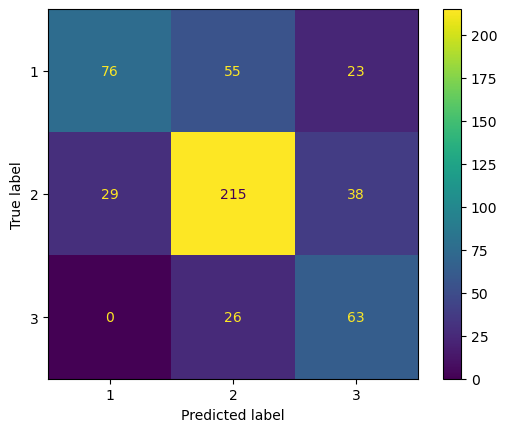

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3])
d.plot()

In [27]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.72      0.49      0.59       154
           2       0.73      0.76      0.74       282
           3       0.51      0.71      0.59        89

    accuracy                           0.67       525
   macro avg       0.65      0.65      0.64       525
weighted avg       0.69      0.67      0.67       525



Credit score 2 has the highest precision 0.72, which indicates that when the model predicts credit score 2, it is correct around 72% of the time. Credit score 1 and credit score 3 have lower precision values of 0.73 and 0.51, respectively.

Furthermore, credit score 2 also has the highest recall (0.76), indicating that the model identifies around 76% of the actual instances of credit score 2 correctly. Credit score 3 has a relatively high recall of 0.71, while credit score 1 has the lowest recall of 0.49.

F1-score combines precision and recall into a single metric, considering both the ability to correctly identify positive instances and avoid false positives. Credit score 2 has the highest F1-score of 0.74, indicating a good balance between precision and recall. Credit score 1 and credit score 3 have lower F1-scores of 0.59 and 0.59, respectively.

Based on the output, we can come up with the result that the accuracy for the SVC model is 0.67, which represents the proportion of correctly classified instances out of all instances in the dataset. Although accuracy provides an overall measure of model performance, it may not reflect the performance for each individual class. The macro-average F1-score is 0.64, which is the average F1-score across all classes, giving equal weight to each class. The weighted average F1-score is also 0.67, which considers the class distribution in the dataset.

### 7 - Kaggle Submission

In [28]:
# from sklearn.preprocessing import StandardScaler
# kaggle = pd.read_csv('FIT1043-Credit-Scores-Submission.csv')
# x = pd.DataFrame(kaggle.iloc[:, [14,8,13,10,17,15,18,7,11,6,9,12,22,4]].values)
# sc = StandardScaler()
# x = sc.fit_transform(x)
# y_pred = best_svc.predict(x) 

# result = pd.read_csv('33363056-ChaiKeRou-v52.csv')
# result['Credit_Score']= y_pred
# # Write to CSV file
# result.to_csv('33363056-ChaiKeRou-v52.csv', index=False)

# result

,ID,Credit_Score
0,89760,1
1,44011,1
2,54153,2
3,25314,2
4,58305,2
...,...,...
895,134797,2
896,150130,2
897,59386,2
898,46677,2


### 8 - Conclusion


To put it in a nutshell, our analysis revealed several key findings. First, we identified a significant imbalance in the class distribution of our target variable, with only 29% of cases belonging to the credit score 1, while there are 54% belonging to the credit score 2 and 17% belonging to the credit score 3 according to the prediction made by the model. Second, we identified several important features for predicting credit score of a client, including credit mix, interest rate, num credit inquiries and etc. A person with more types of credit accounts, also low annual interest rate incurred on the credit
card’s charges and his/her credit report has rarely been accessed by lenders or creditors within a certain period of time will have a high credit score. Finally, our models achieved a high accuracy score of 0.67 and a QWK score of 0.50, indicating normal predictive power. 

I was given the chance to examine a real-world dataset for this data analysis project in order to gather insights and respond to research questions. Overall, I believe that I completed the job successfully and met the predetermined goals. This project taught me the value of data preprocessing, feature engineering, model selection, model training, model evaluation and etc. The dataset initially had a significant amount of outliers, which made it challenging to do insightful analysis. Nonetheless, making the best choice for the predictive model and hyperparameter to use presented another hurdle for me as numerous options are available. Throughout the project, I also try to explore several methods in order to enhance the performance of my model, such as OneClassSVM, Z-Score, Oversampling or Undersampling, computing and modifying class weight and etc. However, I found that the performance of the model declines after implementing those method. To further illustrate this, those methods might engender overfitting issue to the model and render in the decreasing of the performance, so I choose to remove them after finding this issue. Overall, I am glad with the project's results and the learnings I was able to draw from the data. I think this experience has helped me perform better at data analysis and will be helpful in the projects I work on in the future.

### 9 - References

1.https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/